In [1]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

# matplolib, 폰트설정
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumBarunGothic.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운로드

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input,train_target),(test_input,test_target) = load_data()

In [4]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
def show_images(dataset,label,nrow,ncol):
     #캔버스설정
     fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol,2*nrow),facecolor='w')
     ax = axes.ravel()

     xlabels = label[0:nrow*ncol]
     for i in range(nrow*ncol):
          image = dataset[i]
          ax[i].imshow(image,cmap='gray_r')
          ax[i].set_xticks([])
          ax[i].set_yticks([])
          ax[i].set_xlabel(xlabels[i])
     
     plt.tight_layout()
     plt.show()

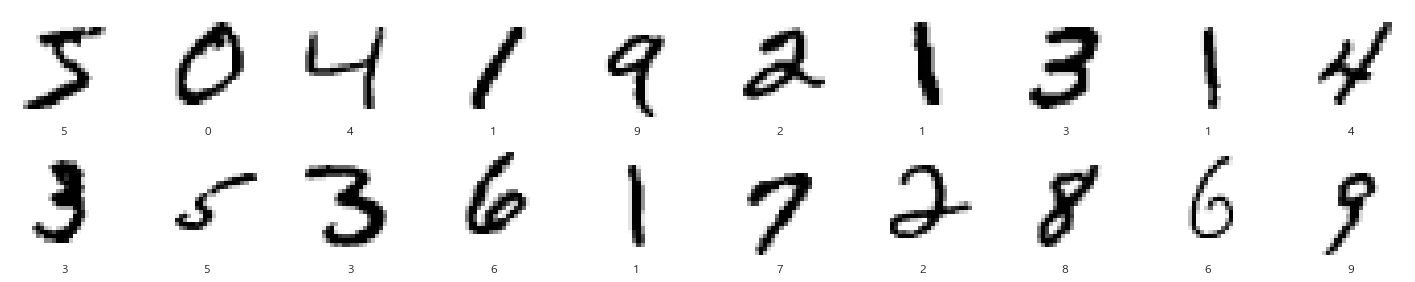

In [9]:
show_images(train_input,train_target,2,10)

In [28]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax',name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 1000)              785000    
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 output (Dense)              (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax',name='output'))
model.summary()

In [29]:
# 255.0으로 나눠서 0~1로 값을 축소하는 작업 안해
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_input,train_target,epochs=20, verbose=1, validation_data=(test_input,test_target),batch_size=100,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
594/600 [============================>.] - ETA: 0s - loss: 5.0045 - accuracy: 0.8950
Epoch 1: val_loss improved from inf to 0.44682, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 4.9606 - accuracy: 0.8950 - val_loss: 0.4468 - val_accuracy: 0.9451
Epoch 2/20
599/600 [============================>.] - ETA: 0s - loss: 0.4470 - accuracy: 0.9305
Epoch 2: val_loss improved from 0.44682 to 0.26389, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 5s 8ms/step - loss: 0.4469 - accuracy: 0.9305 - val_loss: 0.2639 - val_accuracy: 0.9552
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.3153 - accuracy: 0.9408
Epoch 3: val_loss did not improve from 0.26389
600/600 [==============================] - 5s 8ms/step - loss: 0.3153 - accuracy: 0.9408 - val_loss: 0.2826 - val_accuracy: 0.9544
Epoch 4/20
598/600 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0

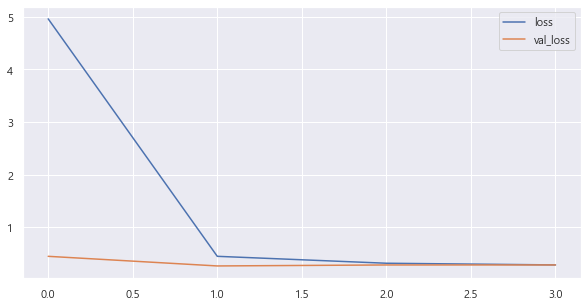

In [30]:

plot_target = ['loss','val_loss']
plt.figure(figsize=(10,5))

for each in plot_target:
     plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

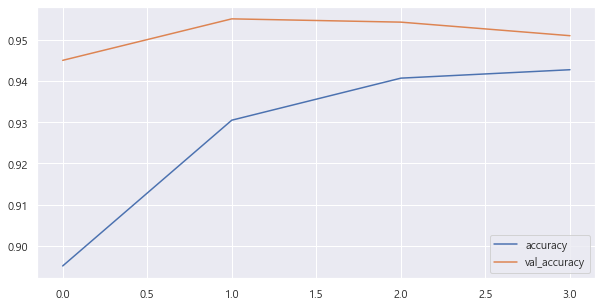

In [31]:
plot_target = ['accuracy','val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
     plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [32]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9552


[0.26389279961586, 0.9552000164985657]

In [33]:
# 예측된 결과값 리스트 
pred_result = model.predict(test_input)


313/313 [==============================] - 1s 3ms/step


In [34]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

#### 예측 실패 이미지 파악

In [35]:
wrong_result = []

for i in range(0,len(test_target)):
     if pred_labels[i] != test_target[i]:
          wrong_result.append(i)

len(wrong_result)

448

In [36]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

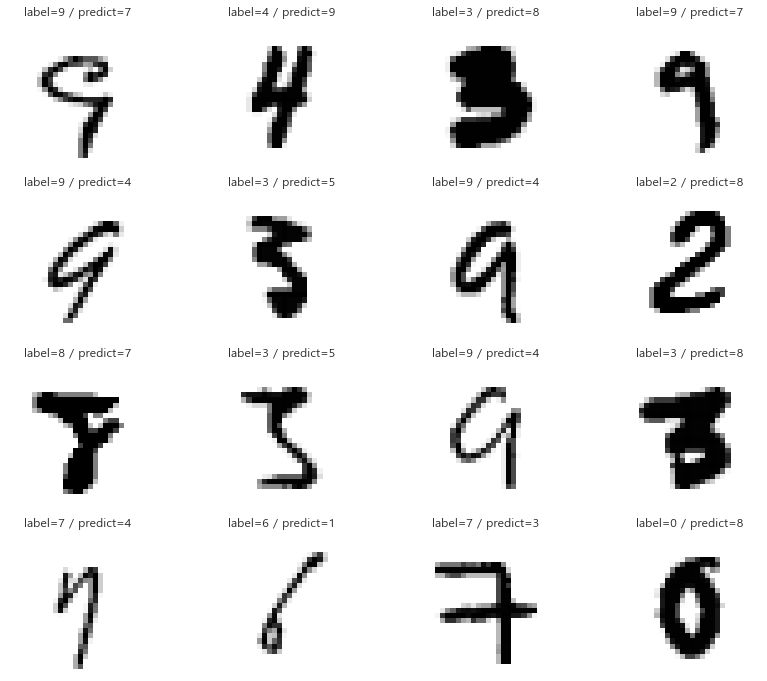

In [37]:
# 예측실패한 이미지 확인

plt.figure(figsize=(14,12))
for idx,n in enumerate(samples):
     plt.subplot(4,4, idx+1)
     plt.imshow(test_input[n].reshape(28,28),cmap='gray_r',interpolation='nearest')
     plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
     plt.axis('off')

plt.show()